In [4]:
import pandas as pd
import numpy as np

#from feature_selector import FeatureSelector
from feature_selector_lightgbm import FeatureSelector

In [5]:
train = pd.read_csv('C:\\Users\\somya\\Documents\\CS 6220 Data Mining Techniques\\Project\\New folder\\Data without Missing Value\\application_train.csv')
train_features = train
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_features["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### RANDOM UNDER SAMPLING

In [7]:
# Class count
count_class_0, count_class_1 = train_features.TARGET.value_counts()

# Divide by class
df_class_0 = train_features[train_features['TARGET'] == 0]
df_class_1 = train_features[train_features['TARGET'] == 1]

Random under-sampling:
1    24825
0    24825
Name: TARGET, dtype: int64


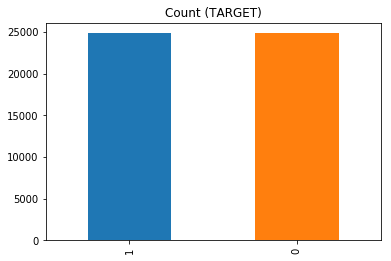

In [8]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.TARGET.value_counts())

df_test_under.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

In [9]:
train_labels = df_test_under['TARGET']

In [10]:
train = df_test_under.drop(columns = ['TARGET'])

In [11]:
fs = FeatureSelector(data = train, labels = train_labels)

In [12]:
fs.identify_missing(missing_threshold=0.6)

23 features with greater than 0.60 missing values.



In [13]:
missing_features = fs.ops['missing']
missing_features[:10]

['OWN_CAR_AGE',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE']

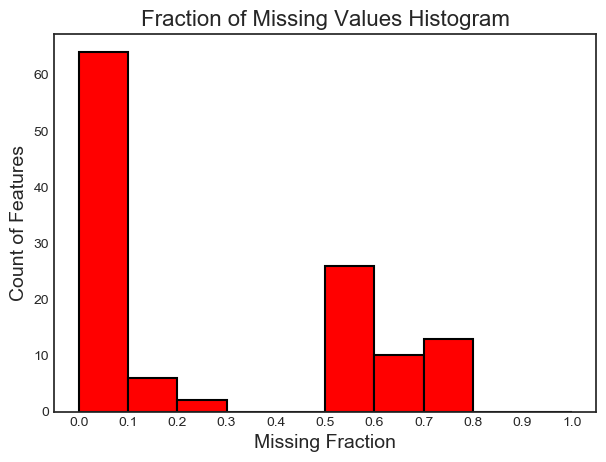

In [14]:
fs.plot_missing()

In [15]:

fs.missing_stats.head(10)

,missing_fraction
COMMONAREA_AVG,0.720121
COMMONAREA_MODE,0.720121
COMMONAREA_MEDI,0.720121
NONLIVINGAPARTMENTS_AVG,0.715911
NONLIVINGAPARTMENTS_MODE,0.715911
NONLIVINGAPARTMENTS_MEDI,0.715911
FONDKAPREMONT_MODE,0.706244
LIVINGAPARTMENTS_MEDI,0.705780
LIVINGAPARTMENTS_AVG,0.705780
LIVINGAPARTMENTS_MODE,0.705780


In [16]:
fs.identify_single_unique()

2 features with a single unique value.



In [17]:
single_unique = fs.ops['single_unique']
single_unique

['FLAG_MOBIL', 'FLAG_DOCUMENT_12']

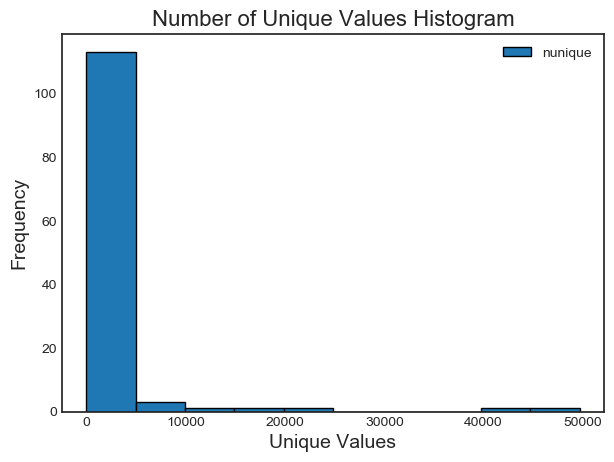

In [18]:
fs.plot_unique()

In [19]:
fs.unique_stats.sample(5)

,nunique
BASEMENTAREA_MEDI,2641
LIVE_REGION_NOT_WORK_REGION,2
FLOORSMIN_MODE,25
OBS_30_CNT_SOCIAL_CIRCLE,27
FLAG_DOCUMENT_5,2


In [20]:
fs.identify_collinear(correlation_threshold=0.975)


28 features with a correlation magnitude greater than 0.97.



In [21]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE']

In [22]:
fs.record_collinear.head()

,corr_feature,corr_value,drop_feature
0,AMT_CREDIT,0.985538,AMT_GOODS_PRICE
1,DAYS_EMPLOYED,-0.999808,FLAG_EMP_PHONE
2,APARTMENTS_AVG,0.975569,APARTMENTS_MODE
3,BASEMENTAREA_AVG,0.978572,BASEMENTAREA_MODE
4,YEARS_BEGINEXPLUATATION_AVG,0.981984,YEARS_BEGINEXPLUATATION_MODE


In [23]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[183]	valid_0's auc: 0.752883
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[159]	valid_0's auc: 0.753133
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[219]	valid_0's auc: 0.751467
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[155]	valid_0's auc: 0.758689
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[129]	valid_0's auc: 0.761912
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[195]	valid_0's auc: 0.759583
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[229]	valid_0's auc: 0.769907
Training until validation scores don't improve for 100 rounds.
Early s

In [24]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 121 original features
There are 138 one-hot features


In [25]:
train_features.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
fs.data_all.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
179279,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
223423,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
192912,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,4.0,1.0,5.0
80267,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
216269,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [27]:

zero_importance_features= fs.ops['zero_importance']
zero_importance_features

['FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_CONT_MOBILE',
 'OCCUPATION_TYPE_HR staff',
 'FLAG_DOCUMENT_21',
 'ORGANIZATION_TYPE_XNA',
 'NAME_INCOME_TYPE_Student',
 'CODE_GENDER_XNA',
 'NAME_INCOME_TYPE_Unemployed',
 'FLAG_OWN_CAR_N',
 'ORGANIZATION_TYPE_Trade: type 5',
 'HOUSETYPE_MODE_terraced house',
 'NAME_EDUCATION_TYPE_Academic degree',
 'WALLSMATERIAL_MODE_Mixed',
 'NAME_TYPE_SUITE_Other_A',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR_Y',
 'ORGANIZATION_TYPE_Industry: type 2',
 'ORGANIZATION_TYPE_Trade: type 4',
 'ORGANIZATION_TYPE_Mobile',
 'ORGANIZATION_TYPE_Industry: type 10',
 'ORGANIZATION_TYPE_Industry: type 6',
 'ORGANIZATION_TYPE_Industry: type 7',
 'ORGANIZATION_TYPE_Industry: type 8',
 'FLAG_DOCUMENT_2',
 'ORGANIZATION_TYPE_Insurance',
 'NAME_INCOME_TYPE_Maternity leave',
 'ORGANIZATION_TYPE_Legal Services',
 'ORGANIZATION_TYPE_Emergency',
 'ORGANIZATION_TYPE_Culture',
 'FLAG_DOCUMENT_4',
 'OCCUPATION_TYPE_Realty agents',
 'ORGANIZATION_TYPE_Cleaning',
 'FLAG_

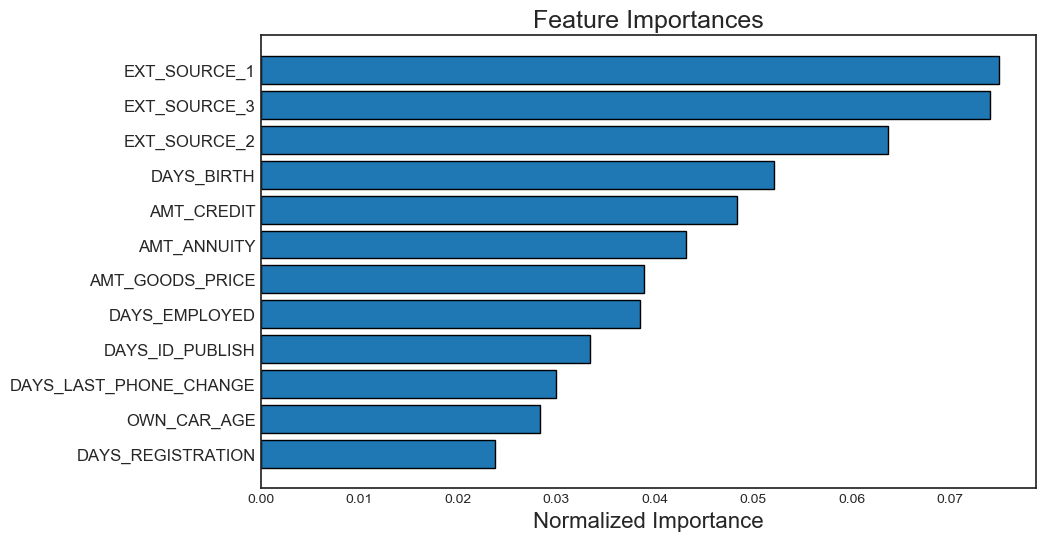

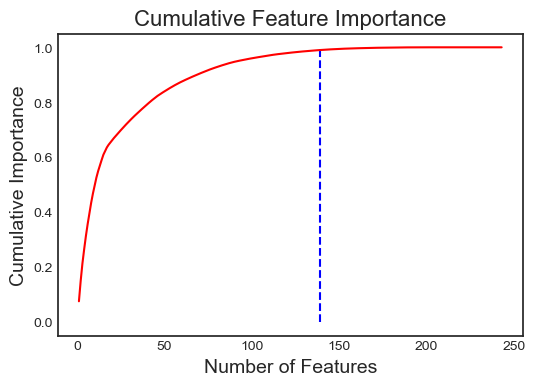

139 features required for 0.99 of cumulative importance


In [28]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [29]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,EXT_SOURCE_1,442.5,0.074911,0.074911
1,EXT_SOURCE_3,437.3,0.074031,0.148942
2,EXT_SOURCE_2,376.0,0.063653,0.212595
3,DAYS_BIRTH,307.6,0.052074,0.264669
4,AMT_CREDIT,285.6,0.048349,0.313018
5,AMT_ANNUITY,255.3,0.043220,0.356238
6,AMT_GOODS_PRICE,229.6,0.038869,0.395107
7,DAYS_EMPLOYED,227.3,0.038480,0.433587
8,DAYS_ID_PUBLISH,197.7,0.033469,0.467056
9,DAYS_LAST_PHONE_CHANGE,177.2,0.029998,0.497054


In [30]:
fs.identify_low_importance(cumulative_importance = 0.99)

138 features required for cumulative importance of 0.99 after one hot encoding.
105 features do not contribute to cumulative importance of 0.99.



In [31]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['FLAG_DOCUMENT_11',
 'NONLIVINGAPARTMENTS_MEDI',
 'NAME_HOUSING_TYPE_With parents',
 'ELEVATORS_MEDI',
 'NAME_INCOME_TYPE_Pensioner']

In [32]:

fs=  FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

23 features with greater than 0.60 missing values.

2 features with a single unique value.

22 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[175]	valid_0's auc: 0.764107
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[192]	valid_0's auc: 0.760877
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[194]	valid_0's auc: 0.762355
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[188]	valid_0's auc: 0.759487
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[200]	valid_0's auc: 0.757762
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[298]	valid_0's auc: 0.760905
Training until validation scores don't improv

In [33]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'], keep_one_hot = False)

Removed 173 features including one-hot features.


In [34]:
train_no_missing_zero

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
179279,307744,Cash loans,F,N,Y,0,216000.0,1800000.0,49630.5,1800000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
223423,358776,Cash loans,M,Y,Y,0,45000.0,152820.0,16344.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
192912,323712,Cash loans,F,N,Y,0,90000.0,188460.0,8113.5,135000.0,...,0,0,0,0,0.0,0.0,0.0,4.0,1.0,5.0
80267,193058,Cash loans,F,N,Y,3,135000.0,343377.0,16137.0,283500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
216269,350588,Cash loans,M,Y,Y,1,225000.0,1125000.0,44748.0,1125000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
119254,238285,Cash loans,F,N,N,0,90000.0,343800.0,12478.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
81630,194661,Cash loans,M,Y,Y,0,270000.0,206280.0,7906.5,135000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
15440,118019,Cash loans,F,N,Y,2,202500.0,808650.0,26217.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
78341,190817,Cash loans,M,N,Y,0,135000.0,222768.0,19246.5,180000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
174875,302653,Cash loans,M,N,Y,2,166500.0,239850.0,22657.5,225000.0,...,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 193 features including one-hot features.


In [36]:
train_removed_all

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
179279,307744,Cash loans,F,N,Y,0,216000.0,1800000.0,49630.5,Unaccompanied,...,1,0,0,0,0,0,0.0,0.0,0.0,2.0
223423,358776,Cash loans,M,Y,Y,0,45000.0,152820.0,16344.0,Unaccompanied,...,1,0,0,0,0,0,0.0,0.0,0.0,0.0
192912,323712,Cash loans,F,N,Y,0,90000.0,188460.0,8113.5,Unaccompanied,...,1,0,0,0,0,0,0.0,4.0,1.0,5.0
80267,193058,Cash loans,F,N,Y,3,135000.0,343377.0,16137.0,Family,...,1,0,0,0,0,0,0.0,1.0,0.0,1.0
216269,350588,Cash loans,M,Y,Y,1,225000.0,1125000.0,44748.0,Family,...,1,0,0,0,0,0,0.0,0.0,1.0,1.0
119254,238285,Cash loans,F,N,N,0,90000.0,343800.0,12478.5,Family,...,1,0,0,0,0,0,NaN,NaN,NaN,NaN
81630,194661,Cash loans,M,Y,Y,0,270000.0,206280.0,7906.5,Unaccompanied,...,0,1,0,0,0,0,0.0,1.0,0.0,8.0
15440,118019,Cash loans,F,N,Y,2,202500.0,808650.0,26217.0,Family,...,1,0,0,0,0,0,0.0,0.0,0.0,1.0
78341,190817,Cash loans,M,N,Y,0,135000.0,222768.0,19246.5,Unaccompanied,...,1,0,0,0,0,0,NaN,NaN,NaN,NaN
174875,302653,Cash loans,M,N,Y,2,166500.0,239850.0,22657.5,Unaccompanied,...,1,0,0,0,1,0,NaN,NaN,NaN,NaN


In [37]:
train_removed_all.shape

(49650, 66)

In [38]:
train_removed_all.to_csv('app_train_removed_all_76.csv')

**Encoding on the train file**

In [39]:
train=train_removed_all

In [40]:
#Label Encoder

# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            #app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


3 columns were label encoded.


In [41]:
# One-Hot encoding of categorical variables

train = pd.get_dummies(train)
#app_test = pd.get_dummies(app_test)

print('Training Features shape: ', train.shape)

Training Features shape:  (49650, 182)


**Load test set**

In [42]:
test = pd.read_csv('C:\\Users\\somya\\Documents\\CS 6220 Data Mining Techniques\\Project\\New folder\\Data without Missing Value\\application_train.csv')

In [43]:
#train = pd.read_csv("C:/SHARYU/NEU/Unsupervised2/Project/application_train.csv/application_train.csv",  header=0, sep=',', quotechar='"')
test_features = test
#train_labels = train['TARGET']
test.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Encoding test set**

In [44]:
#Label Encoder

# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in test:
    if test[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(test[col].unique())) <= 2:
            # Train on the training data
            le.fit(test[col])
            # Transform both training and testing data
            test[col] = le.transform(test[col])
            #app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


3 columns were label encoded.


In [45]:
# One-Hot encoding of categorical variables

test = pd.get_dummies(test)


print('Training Features shape: ', test.shape)

Training Features shape:  (307511, 243)


**Align train test**

In [46]:

# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
train['TARGET'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (49650, 183)
Testing Features shape:  (307511, 182)


**Impute missing values in train and test set**

In [47]:
# Impute missing values

from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in train:
    train1 = train.drop(columns = ['TARGET'])
else:
    train1 = train.copy()
    
# Feature names
features = list(train1.columns)

# Copy of the testing data
test1 = test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'most_frequent')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train1)

# Transform both training and testing data
train1 = imputer.transform(train1)
test1 = imputer.transform(test1)

# Repeat with the scaler
scaler.fit(train1)
train1 = scaler.transform(train1)
test1 = scaler.transform(test1)

print('Training data shape: ', train1.shape)
print('Testing data shape: ', test1.shape)

Training data shape:  (49650, 182)
Testing data shape:  (307511, 182)


In [48]:
from sklearn.model_selection import train_test_split

# create training and testing vars

X_train, X_validate, y_train, y_validate = train_test_split(train1, train_labels, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_validate.shape, y_validate.shape)

(39720, 182) (39720,)
(9930, 182) (9930,)


In [49]:
from sklearn import linear_model

In [50]:
logistic = linear_model.LogisticRegression(C=1e5)

In [51]:
logistic.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [52]:
logistic_score = logistic.score(X_validate, y_validate)

In [53]:
logistic_score

0.6601208459214502